In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x=np.random.randn(2)
A=np.random.randn(2,2)
print ('x的內容：\n{}\n A的內容是：\n{}'.format(x,A))

x的內容：
[0.41698959 0.80593425]
 A的內容是：
[[ 1.35771053 -0.54575826]
 [ 1.04682647 -1.643131  ]]


In [3]:
def action(pt,n):
    record=[pt]
    for i in range(n):
        pt= A@pt
        record=np.vstack([record,pt])
    plt.scatter(record[:,1],record[:,1])

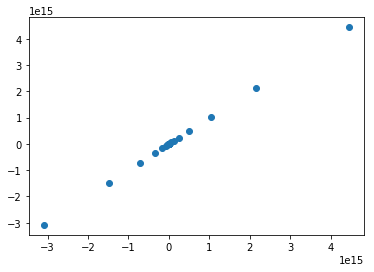

In [4]:
action(x,100)

In [ ]:
from ipywidgets import interact 

def qq(x,y,n):
    pt =np.array([x,y])
    action(pt,n)

interact(qq,x=(-3.0,5.0),y=(-3.0,2.0),n=(0,200))

/Users/zen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


(-b*x - d + sqrt(-4*a*c*x - 4*a*e + 4*a*x**2 + b**2*x**2 + 2*b*d*x + d**2))/(2*a)
-(b*x + d + sqrt(-4*a*c*x - 4*a*e + 4*a*x**2 + b**2*x**2 + 2*b*d*x + d**2))/(2*a)


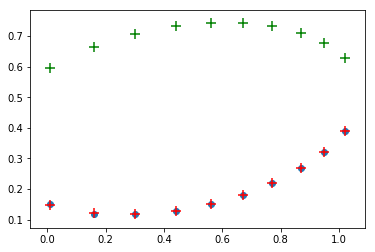

In [37]:
from numpy import linalg
from numpy import linspace
import numpy as np
from numpy import meshgrid
import random
import matplotlib.pyplot as plt
from scipy import optimize
from sympy import *

xs = [1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01]
ys = [0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.12, 0.15]

b = [i ** 2 for i in xs] # That is the list that contains the results that are given as x^2 from the equation.

def fxn(x, y):  # That is the function that solves the given equation to find each parameter.
    my_list = [] #It is the main list.
    for z in range(len(x)):
        w = [0] * 5
        w[0] = y[z] ** 2
        w[1] = x[z] * y[z]
        w[2] = x[z]
        w[3] = y[z]
        w[4] = 1
        my_list.append(w)
    return my_list

t = linalg.lstsq(fxn(xs, ys), b)


def ysolv(coeffs):
    x,y,a,b,c,d,e = symbols('x y a b c d e')
    ellipse = a*y**2 + b*x*y + c*x + d*y + e - x**2
    y_sols = solve(ellipse, y)
    print(*y_sols, sep='\n')

    num_coefs = [(a, f) for a, f in (zip([a,b,c,d,e], coeffs))]
    y_solsf0 = y_sols[0].subs(num_coefs)
    y_solsf1 = y_sols[1].subs(num_coefs)

    f0 = lambdify([x], y_solsf0)
    f1 = lambdify([x], y_solsf1)
    return f0, f1

f0, f1 = ysolv(t[0])

y0 = [f0(x) for x in xs]
y1 = [f1(x) for x in xs]

plt.scatter(xs, ys)
plt.scatter(xs, y0, s=100, color = 'red', marker='+')
plt.scatter(xs, y1, s=100, color = 'green', marker='+')
plt.show()  

In [ ]:
def feeloutXrange(f, midx, endx):
    fxs = []
    x = midx
    while True:
        try: f(x)
        except:
            break
        fxs.append(x)
        x += (endx - midx)/100
    return fxs

midx = (min(xs) + max(xs))/2    

xpos = feeloutXrange(f0, midx, max(xs))
xnegs = feeloutXrange(f0, midx, min(xs))
xs_ellipse = xnegs[::-1] + xpos[1:]

y0s = [f0(x) for x in xs_ellipse]
y1s = [f1(x) for x in xs_ellipse]

ys_ellipse = y0s + y1s[::-1] + [y0s[0]] # add y start point to end to close drawing

xs_ellipse = xs_ellipse + xs_ellipse[::-1] + [xs_ellipse[0]] # added x start point


plt.scatter(xs, ys)
plt.scatter(xs, y0, s=100, color = 'red', marker='+')
plt.scatter(xs, y1, s=100, color = 'green', marker='+')
plt.plot(xs_ellipse, ys_ellipse)
plt.show()

/Users/zen/anaconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """
